In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [206]:
time = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/지상관측_시간_9246057.csv', sep=',', index_col=0)
day = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/ground_day.csv', sep=',', index_col=0)
elec = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/5minute_demand_y_(12.06~).csv', sep=',', index_col=0)

C:\Users\hslio\AppData\Local\Temp\ipykernel_19908\3445905784.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  time = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/지상관측_시간_9246057.csv', sep=',', index_col=0)


In [231]:
# 결측치 확인
def missing_per(df):
    missing_percentages = df.isnull().mean() * 100
    missing_percentages_df = pd.DataFrame({'결측치 비율(%)': missing_percentages})
    
    return missing_percentages_df

# 80% 이상 결측치 컬럼 삭제
def delete_80(df):
    threshold = 0.8
    missing_percentages = df.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages >= threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

# describe() 함수 시각화
def describe_vis(df1, df2):
    summary1 = df1.describe()
    summary2 = df2.describe()
    plt.figure(figsize=(10, 6))
    summary1.plot(kind='bar', colormap='Set2', alpha=0.7, position=0, label='Data1')
    summary2.plot(kind='bar', colormap='Set2', alpha=0.7, position=1, label='Data2')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

# 스타일링 함수
def highlight_cells(value):
    if value >= 80 :  # 특정 값 이상인 경우
        return 'background-color: yellow'
    else:
        return ''
    
# , 제거 함수
def remove_comma(value):
    if isinstance(value, str):
        return value.replace(',', '')
    else:
        return value

# 데이터 별 값 분포도 확인
def value_confirm(df):
    for column in df.columns:
        counts = df[column].value_counts()
        print(f"Value counts for column '{column}':")
        print(counts)
        
        plt.figure()  
        plt.bar(counts.index, counts.values)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Value Counts of {column}')
        plt.show()
        
        print()


In [202]:
# 데이터 별 결측치 비율 확인, 80% 이상 노란색

display(missing_per(time).style.applymap(highlight_cells))
display(missing_per(day).style.applymap(highlight_cells))
display(missing_per(elec).style.applymap(highlight_cells))

,결측치 비율(%)
지점,0.000000
지점명,0.000000
일시,0.000000
기온(°C),0.045457
기온 QC플래그,38.953188
강수량(mm),90.988753
강수량 QC플래그,77.398344
풍속(m/s),0.103969
풍속 QC플래그,40.310459
풍향(16방위),0.228887


,결측치 비율(%)
기준일시,0.000000
일 평균 풍속 (m/s),0.000000
일 풍정 (m),0.000000
최대풍향,0.000000
최대풍속 (m/s),0.000000
최대순간풍향,0.000000
최대순간풍속 (m/s),0.000000
일 평균기온 (C),0.000000
최고기온 (C),0.000000
최저기온 (C),0.000000


,결측치 비율(%)
현재수요(MW),0.053514


# Time, Day Data

## time 데이터의 적설, 강수량의 Nan 값은 0으로 처리 + 80% 이상 결측치 데이터 drop

In [214]:
# time 
time['적설(cm)'].fillna(0, inplace=True)
time['강수량(mm)'].fillna(0, inplace=True)
time = delete_80(time)

# day
day = delete_80(day)

Value counts for column '지점':
143    98137
133    98137
159    98137
156    98137
119    98137
       ...  
239    33158
176    14866
256     4403
187        4
116        1
Name: 지점, Length: 100, dtype: int64


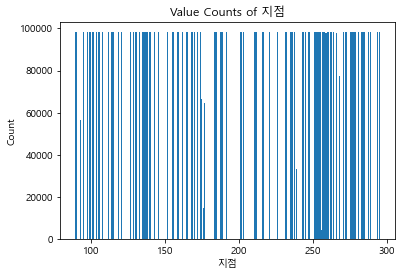


Value counts for column '지점명':
대전       98137
수원       98137
부산       98137
광주       98137
대구       98137
         ...  
북춘천      56496
세종       33158
대구(기)    14866
주암        4403
관악산          1
Name: 지점명, Length: 99, dtype: int64


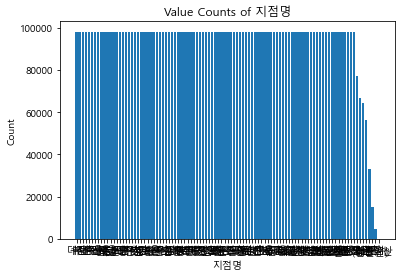


Value counts for column '일시':
2019-07-16 03:00    96
2019-07-23 05:00    96
2019-07-22 16:00    96
2019-07-22 17:00    96
2019-07-22 18:00    96
                    ..
2013-09-13 09:00    90
2015-09-28 14:00    89
2016-02-08 16:00    87
2015-06-27 05:00    18
2015-11-02 22:00    13
Name: 일시, Length: 98137, dtype: int64


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002230D2C7B80> (for post_execute):


KeyboardInterrupt: 

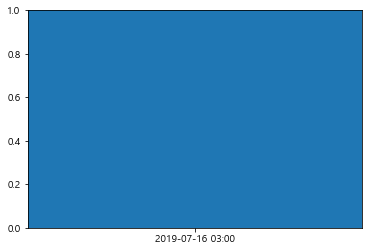

In [232]:
# 각 컬럼별 데이터 상태 확인
display(value_confirm(time))
display(print('='*50))
display(value_confirm(day))

# elec 결측값 처리

<Axes: xlabel='기준일시'>

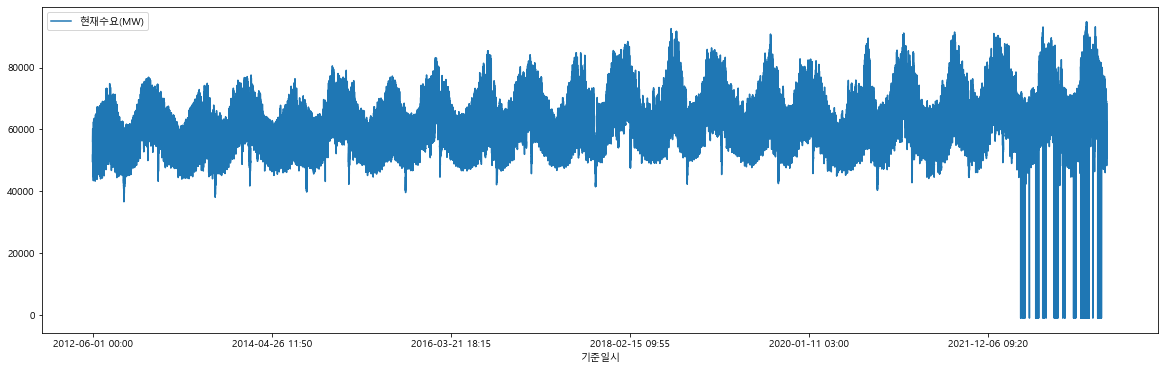

In [159]:
# 결측값을 -999로 채워 어느 부분에 결측값이 있는지 시각적으로 확인

elec.fillna(-999).plot(figsize=(20, 6))

<Axes: xlabel='기준일시'>

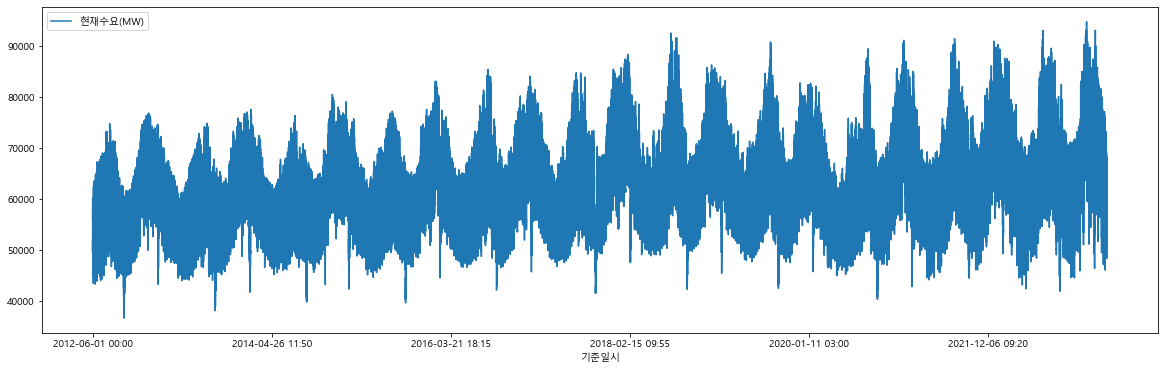

In [160]:
# 그래프를 보면 시간별 특정 패턴이 있다고 판단되기 때문에, 전력 수요량의 결측값은 바로 앞에 값으로 채우기로 결정

elec_fillna = elec.fillna(method = 'ffill')
elec_fillna.plot(figsize=(20, 6))

In [185]:
# 4분위 값으로 비교했을 때 크게 차이가 나지 않는 것을 확인할 수 있다

summary = elec.describe()
summary2 = elec_fillna.describe()

# 특정 열의 값 비교
min_value_compare = summary.loc['min']
max_value_compare = summary.loc['max']
mean_value_compare = summary.loc['mean']
median_value_compare1 = summary.loc['25%']
median_value_compare2 = summary.loc['50%']
median_value_compare3 = summary.loc['75%']

min_value = summary2.loc['min']
max_value = summary2.loc['max']
mean_value = summary2.loc['mean']
median_value1 = summary2.loc['25%']
median_value2 = summary2.loc['50%']
median_value3 = summary2.loc['75%']

# 결과 출력
print(f"Minimum value of column {min_value_compare - min_value}")
print(f"Maximum value of column {max_value_compare - max_value}")
print(f"Mean value of column {mean_value_compare - mean_value}")
print(f"25% value of column {median_value_compare1 - median_value1}")
print(f"50% value of column {median_value_compare2 - median_value2}")
print(f"75% value of column {median_value_compare3 - median_value3}")

Minimum value of column 현재수요(MW)    0.0
Name: min, dtype: float64
Maximum value of column 현재수요(MW)    0.0
Name: max, dtype: float64
Mean value of column 현재수요(MW)   -1.038253
Name: mean, dtype: float64
25% value of column 현재수요(MW)    2.1775
Name: 25%, dtype: float64
50% value of column 현재수요(MW)    1.41
Name: 50%, dtype: float64
75% value of column 현재수요(MW)   -0.8075
Name: 75%, dtype: float64


# Data Concat